In [5]:
import pandas as pd
from statsmodels.regression.linear_model import OLS
from statsmodels.tools.tools import add_constant
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
FILE = 'clean.parq.gzip'

sns.set_style("darkgrid")

In [4]:
data = pd.read_parquet(FILE)
data.head()

,spend_1m_baby,spend_2m_baby,spend_3m_baby,spend_4m_baby,spend_5m_baby,spend_6m_baby,spend_1m_clothes,spend_2m_clothes,spend_3m_clothes,spend_4m_clothes,...,spend_6m_eletronic,sales,discount,profit,age,gender,cust_state,tenure,sales_prediction_bins,sales_prediction
0,0,0,0,0,0,0.0,0,0.0,0.0,0.0,...,0.0,3368.64,125.0,40.06,40,1.0,MA,6,8,1351.024765
1,0,0,0,0,0,0.0,0,0.0,0.0,0.0,...,0.0,2133.10,75.0,29.52,36,0.0,MG,10,4,1035.580387
2,0,0,0,0,0,0.0,0,0.0,0.0,0.0,...,0.0,2001.62,50.0,48.08,34,0.0,RJ,7,3,992.401825
3,0,0,0,0,0,0.0,0,0.0,0.0,0.0,...,0.0,1461.96,10.0,61.64,31,0.0,BA,7,1,919.720735
4,0,0,0,0,0,0.0,0,0.0,0.0,0.0,...,0.0,2743.72,100.0,34.44,32,1.0,PB,6,6,1176.485681


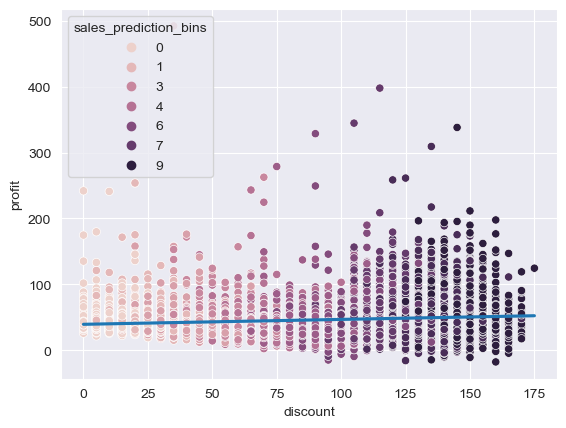

In [19]:
fig, ax = plt.subplots()

sns.scatterplot(
    x='discount', 
    y='profit',
    hue='sales_prediction_bins',
    data=data,
    ax=ax
)
sns.regplot(
    x='discount', 
    y='profit',
    data=data,
    scatter=False,
    ax=ax
)
plt.show()

In [20]:
mod_1 = OLS(data['discount'], pd.get_dummies(data['sales_prediction_bins'], drop_first=False))
fit_1 = mod_1.fit()
fit_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               discount   R-squared:                       0.939
Model:                            OLS   Adj. R-squared:                  0.939
Method:                 Least Squares   F-statistic:                 2.552e+04
Date:                Fri, 02 Dec 2022   Prob (F-statistic):               0.00
Time:                        16:01:17   Log-Likelihood:                -57189.
No. Observations:               15000   AIC:                         1.144e+05
Df Residuals:                   14990   BIC:                         1.145e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
0             11.4467      0.283     40.460      0.000      10.892      12.001
1             24.9200      0.283     88.084      0.000      24.365      25.475
2             40.8849      0.283    144.658      0.000      40.331      41.439
3             54.5324      0.283    192.560      0.000      53.977      55.087
4             70.4267      0.283    248.934      0.000      69.872      70.981
5             84.4400      0.283    298.466      0.000      83.885      84.995
6            100.9767      0.283    356.918      0.000     100.422     101.531
7            114.1667      0.283    403.540      0.000     113.612     114.721
8            131.3800      0.283    464.383      0.000     130.825     131.935
9            144.4967      0.283    510.746      0.000     143.942     145.051
==============================================================================
Omnibus:                       12.743   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               12.597
Skew:                           0.061   Prob(JB):                      0.00184
Kurtosis:                       2.927   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

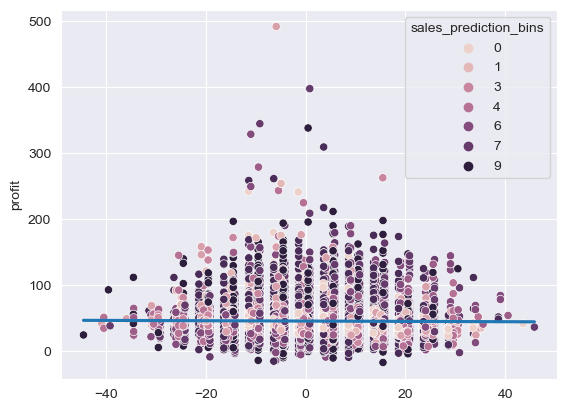

In [27]:
fig, ax = plt.subplots()

sns.scatterplot(
    x=fit_1.resid, 
    y='profit',
    hue='sales_prediction_bins',
    data=data,
    ax=ax
)
sns.regplot(
    x=fit_1.resid, 
    y='profit',
    data=data,
    scatter=False,
    ax=ax
)
plt.show()

In [28]:
mod_2 = OLS(data['profit'], pd.get_dummies(data['sales_prediction_bins'], drop_first=False))
fit_2 = mod_2.fit()
fit_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 profit   R-squared:                       0.060
Model:                            OLS   Adj. R-squared:                  0.060
Method:                 Least Squares   F-statistic:                     106.7
Date:                Fri, 02 Dec 2022   Prob (F-statistic):          1.44e-194
Time:                        16:36:23   Log-Likelihood:                -68079.
No. Observations:               15000   AIC:                         1.362e+05
Df Residuals:                   14990   BIC:                         1.363e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
0             44.9166      0.585     76.815      0.000      43.770      46.063
1             44.9255      0.585     76.830      0.000      43.779      46.072
2             42.4545      0.584     72.677      0.000      41.309      43.599
3             40.3169      0.585     68.879      0.000      39.170      41.464
4             38.4866      0.585     65.818      0.000      37.340      39.633
5             37.6801      0.585     64.439      0.000      36.534      38.826
6             43.6811      0.585     74.702      0.000      42.535      44.827
7             52.1284      0.585     89.148      0.000      50.982      53.275
8             53.9264      0.585     92.223      0.000      52.780      55.073
9             53.4871      0.585     91.472      0.000      52.341      54.633
==============================================================================
Omnibus:                    11355.133   Durbin-Watson:                   2.014
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           579849.513
Skew:                           3.161   Prob(JB):                         0.00
Kurtosis:                      32.796   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

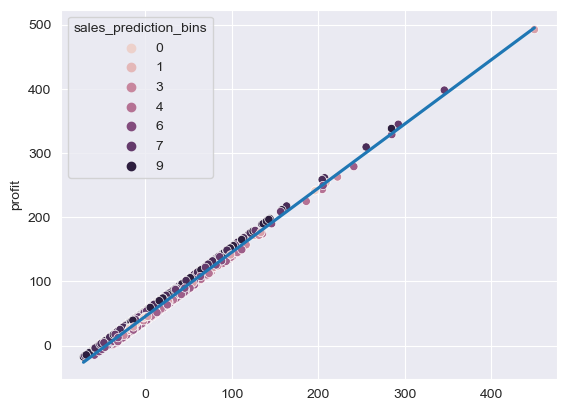

In [29]:
fig, ax = plt.subplots()

sns.scatterplot(
    x=fit_2.resid, 
    y='profit',
    hue='sales_prediction_bins',
    data=data,
    ax=ax
)
sns.regplot(
    x=fit_2.resid, 
    y='profit',
    data=data,
    scatter=False,
    ax=ax
)
plt.show()

In [31]:
mod_3 = OLS(fit_2.resid, add_constant(fit_1.resid))
fit_3 = mod_3.fit()
fit_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     2.144
Date:                Fri, 02 Dec 2022   Prob (F-statistic):              0.143
Time:                        16:43:09   Log-Likelihood:                -68078.
No. Observations:               15000   AIC:                         1.362e+05
Df Residuals:                   14998   BIC:                         1.362e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        2.22e-15      0.185    1.2e-14      1.000      -0.362       0.362
0             -0.0247      0.017     -1.464      0.143      -0.058       0.008
==============================================================================
Omnibus:                    11358.473   Durbin-Watson:                   2.014
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           579356.418
Skew:                           3.163   Prob(JB):                         0.00
Kurtosis:                      32.782   Cond. No.                         11.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [35]:
X = pd.concat([data['discount'], pd.get_dummies(data['sales_prediction_bins'], drop_first=True)], axis=1)
mod_4 = OLS(data['profit'], add_constant(X))
fit_4 = mod_4.fit()
fit_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 profit   R-squared:                       0.060
Model:                            OLS   Adj. R-squared:                  0.060
Method:                 Least Squares   F-statistic:                     96.23
Date:                Fri, 02 Dec 2022   Prob (F-statistic):          5.30e-194
Time:                        16:48:03   Log-Likelihood:                -68078.
No. Observations:               15000   AIC:                         1.362e+05
Df Residuals:                   14989   BIC:                         1.363e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         45.1995      0.616     73.397      0.000      43.992      46.407
discount      -0.0247      0.017     -1.464      0.143      -0.058       0.008
1              0.3418      0.858      0.399      0.690      -1.339       2.023
2             -1.7348      0.964     -1.799      0.072      -3.625       0.156
3             -3.5352      1.102     -3.209      0.001      -5.694      -1.376
4             -4.9727      1.294     -3.842      0.000      -7.510      -2.436
5             -5.4330      1.484     -3.661      0.000      -8.342      -2.524
6              0.9766      1.723      0.567      0.571      -2.400       4.353
7              9.7498      1.921      5.075      0.000       5.984      13.515
8             11.9732      2.187      5.475      0.000       7.687      16.260
9             11.8579      2.393      4.954      0.000       7.167      16.549
==============================================================================
Omnibus:                    11358.473   Durbin-Watson:                   2.014
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           579356.418
Skew:                           3.163   Prob(JB):                         0.00
Kurtosis:                      32.782   Cond. No.                     2.20e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.2e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""